In [14]:
%cd ../

/home/dani2442


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
plt.style.use('science')

from main import ffpca, fpca


In [72]:
N = 200 # number of points
n = 100 # number of samples/observations
p = 5 # number of variables/features

In [73]:
def generate_random_brownian(N, n, p):
    C = np.random.randint(0, 3, size=(p,p))
    r = np.random.multivariate_normal(np.zeros(p), C @ C.T, size=(N, n))

    t = np.linspace(0, 1, N)
    x = np.cumsum((1/np.sqrt(N))*r, axis=0)
    return t, x

In [74]:
t, x = generate_random_brownian(N, n, p)
x_hat = np.fft.fftshift(np.fft.fft(x, axis=0, norm="forward"))

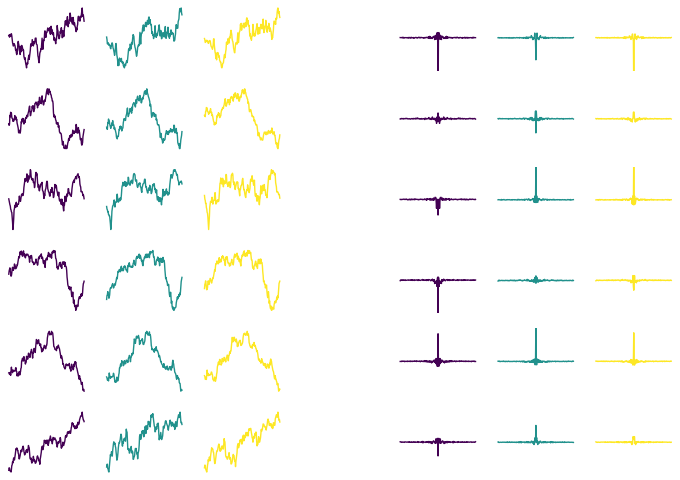

In [75]:
# plot a sample of 6 observations of the first 3 variables
fig, axs = plt.subplots(6, 7, figsize=(7, 5))
cmap = matplotlib.colormaps['viridis'].resampled(3)
for i in range(6):
    for j in range(3):
        ax = axs[i,j]
        ax.plot(t, x[:, i,j], c=cmap(j))
        ax.set_axis_off()

        ax_right = axs[i, j + 4]
        ax_right.plot(x_hat[:, i, j].real, c=cmap(j))
        ax_right.set_axis_off()
        ax_right.set_ylim((-1,1))

# Hide the middle column to make the white line separation
for i in range(6):
    axs[i, 3].set_facecolor("white")
    axs[i, 3].set_xticks([])
    axs[i, 3].set_yticks([])
    axs[i, 3].spines[:].set_visible(False)

plt.tight_layout()
plt.show()

In [76]:
num_exp=100
results = np.zeros((2,p, num_exp))
for i in range(num_exp):
    for _p in range(p):
        t, x = generate_random_brownian(N, n, p)

        x_hat1 = fpca(t, x, _p+1)
        x_hat2 = ffpca(t, x, _p+1)

        results[0, _p, i] = np.mean(np.square(np.absolute(x_hat1 - x)))
        results[1, _p, i] = np.mean(np.square(np.absolute(x_hat2 - x)))

In [77]:
means = np.mean(results, axis=2)
stds = np.std(results, axis=2)

In [78]:
algos = ["fPCA", "ffPCA"]
latex = "\\begin{tabular}[h!]\n{c" + "S[table-format=3.2(1.2)]" * 5 + "}\n"
latex += "\\toprule[1.5pt]\n"
latex += " & " + " & ".join(['{' + f"$k={k}$" + '}' for k in range(1, 6)]) + " \\\\\n"
latex += "\\hline\n"
for algo in range(2):
    row = algos[algo]
    for k in range(5):
        m = means[algo, k]
        s = stds[algo, k]
        row += f" & {m:.2f} \\pm {s:.2f}"
    latex += row + " \\\\\n"

latex += "\\bottomrule[1.5pt]\n"
latex += "\\end{tabular}"

print(latex)

\begin{tabular}[h!]
{cS[table-format=3.2(1.2)]S[table-format=3.2(1.2)]S[table-format=3.2(1.2)]S[table-format=3.2(1.2)]S[table-format=3.2(1.2)]}
\toprule[1.5pt]
 & {$k=1$} & {$k=2$} & {$k=3$} & {$k=4$} & {$k=5$} \\
\hline
fPCA & 1.03 \pm 0.28 & 0.42 \pm 0.17 & 0.10 \pm 0.07 & 0.01 \pm 0.02 & 0.00 \pm 0.00 \\
ffPCA & 1.03 \pm 0.28 & 0.42 \pm 0.17 & 0.10 \pm 0.07 & 0.01 \pm 0.02 & 0.00 \pm 0.00 \\
\bottomrule[1.5pt]
\end{tabular}
